In [1]:
import gradflow.functions as F

from datasets.mnist import MNISTDataset

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Autoencoder:
  def __init__(self, encoding_dim = 48):
    self.encoding_dim = encoding_dim
    self.encoder_layers = [
      F.Linear(28*28, encoding_dim),
      F.ReLU()
    ]
    self.decoder_layers = [
      F.Linear(encoding_dim, 28*28),
      F.Sigmoid()
    ]
  
  def parameters(self):
    # TODO: DO BETER
    return self.encoder_layers[0].parameters() + self.decoder_layers[0].parameters()
  
  def encode(self, x):
    out = x
    for layer in self.encoder_layers:
      out = layer(out)
    return out

  def decode(self, x):
    out = x
    for layer in self.decoder_layers:
      out = layer(out)
    return out
  
  def __call__(self, x):
    out = self.encode(x)
    out = self.decode(out)
    return out

In [3]:
train_dset = MNISTDataset("../data/", batch_size=32*3)
test_dset = MNISTDataset("../data/", batch_size=10, train=False)

train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...
train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...


In [4]:
model = Autoencoder()
criterion = F.BCELoss()
lr = 0.1

In [5]:
training_loss = []
for epoch in range(50):
  for i, (imgs, labels) in enumerate(train_dset):
    for param in model.parameters():
      param.grad = 0

    outputs = model(imgs)
    loss = criterion(outputs, imgs)
    training_loss += [loss.data]

    loss.backward()

    for param in model.parameters():
      param.data = param.data - lr * param.grad

  if ((epoch + 1) % 5 == 0):
    print(loss.data)


0.25353965
0.21938077
0.19777901
0.18439008
0.17496724
0.16762684
0.16142717
0.15594606
0.15099369
0.14647053


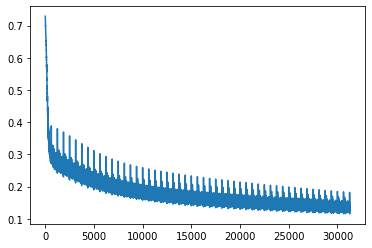

In [6]:
plt.plot(training_loss)

Encoding: [ 1.9154499   0.85308206 -0.          4.566845    3.4254408   6.4165716
  6.0731554  12.753323    1.3279911   1.3225492   5.7228827   1.1542448
 -0.          1.7608445  -0.         11.259147    4.243313   12.967441
  1.7144847   1.221772   -0.          5.3368793   5.900689    5.9378877
  4.152924    7.4078426   5.612215   -0.         12.223853   -0.
 14.329482    7.5661516   6.0015135   6.641346   -0.         10.446256
  2.1939113   1.1194191   0.6805315   2.4830124   2.0325475   1.2297443
 -0.          0.31946528 -0.          5.5456967   2.3466532   1.9198666 ]


Text(0.5, 1.0, 'Predicted')

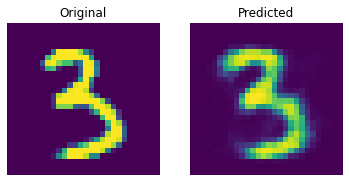

In [7]:
batch = 3
im = 2

true_imgs = test_dset[batch][0]

encodings = model.encode(true_imgs)
print("Encoding:", encodings.data[im])

pred_imgs = model.decode(encodings)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(true_imgs.data[im].reshape(28, 28))
plt.axis("off")
plt.title("Original")

fig.add_subplot(1, 2, 2)
plt.imshow(pred_imgs.data[im].reshape(28, 28))
plt.axis("off")
plt.title("Predicted")

In [8]:
def print_batch(batch, width, height, show_orig = True):
  true_imgs, true_labels = batch
  pred_imgs = model(true_imgs)

  i = 1
  fig = plt.figure(figsize=(height*3, width*4))
  for w in range(width):
    for h in range(height):
      idx = w * height + h
      label = np.argmax(true_labels.data[idx])

      if show_orig:
        fig.add_subplot(width * 2, height * 2, i); i+=1
        plt.imshow(true_imgs.data[idx].reshape(28, 28))
        plt.axis("off")
        plt.title(f"Original ({label})")

      fig.add_subplot(width * 2, height * 2, i); i+=1
      plt.imshow(pred_imgs.data[idx].reshape(28, 28))
      plt.axis("off")
      plt.title(f"Predicted ({label})")

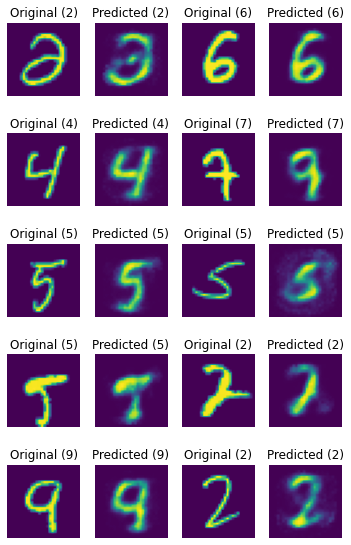

In [9]:
print_batch(test_dset[333], 5, 2)